In [2]:
import ga 
import cube
import numpy as np

cti = ga.cubesToImage(n_cubes_x=10)
args = {
    "population_size": 1000,
    "mutation_rate": 0.9,
    "crossover_rate": 0.4,
    "max_generations": 1000,
    "parent_pool_size": 10,
    "parents_number":  4
}

cti.run(args, filename="olha")


0,0- Generations 1- Fitness: 0.0


KeyboardInterrupt: 

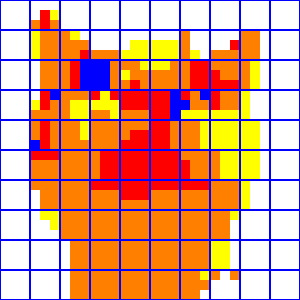

In [3]:
display_image(cti.best_image(1, 10, 40))


In [ ]:
cti.cube_to